
# Problem Set 1 


**Name : `Siba Smarak Panigrahi`** 

**Roll-No : `18CS10069`** 

**Dept : `Computer Science and Engineering`** 

**Mail-ID : `sibasmarak.p@gmail.com`** 

## Preamble

To run and solve this assignment, one must have a working IPython Notebook installation. The easiest way to set it up for both Windows and Linux is to install [Anaconda](https://docs.anaconda.com/anaconda/install/). Then save this file to your computer, run Anaconda and choose this file in Anaconda's file explorer. Use `Python 3` version. Below statements assume that you have already followed these instructions. If you are new to Python or its scientific library, Numpy, there are some nice tutorials [here](https://www.learnpython.org/) and [here](http://www.scipy-lectures.org/).

To run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctr+Enter` or `[>|]`(like "play") button above. To edit any code or text cell [double]click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

We highly encourage students to put down their answers to theoretical questions into corresponding cells below. However, if one does not know LaTeX (and would find it too hard to learn it), he/she can write it in pen-and-paper format and submit the scanned pdf. Note that the solutions to the programming problems should be submitted in the ipynb file itself.

Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctr+Enter to render text. [Double]click on a cell to edit or to see its source code. You can add cells via **`+`** sign at the top left corner.

Submission instructions: Please upload your completed solution file to [CSE Moodle](https://kgpmoodle.iitkgp.ac.in/moodle/login/index.php) by the due date.


`Vector` stands for `column vector` below.

### Problem 1: Closed-Form Maximum Likelihood

**Q1.1**: The **functional Invariance** Property of Maximum Likelihood Estimate (MLE) states that, "If $\hat{\theta}$ is a Maximum Likelihood Estimate (MLE) of $\theta$ and if $g$ is a function, then $g(\hat{\theta})$ is an MLE of $g(\theta)$".

Assume that we are given $n$ iid samples $(x_1, ..., x_n)$ from $P(x \ | \ \theta)$ below:

$P(x \ | \ \theta) = \theta^x (1 - \theta)^{1 - x}$ for $x \in \{0, 1\}$

The MLE for the parameter $\theta$ of given distribution is $\frac{\sum_{i=1}^n x_i}{n}$ (already worked out in class). Now, let us consider $v = g(\theta) = (1 - \theta)$. Compute the MLE for the parameter $v$ of the distribution **without directly using the functional invariance property stated above**:

$P(x \ | \ v) = \theta^x (1 - \theta)^{1 - x}$ for $x \in \{0, 1\}$

**Q1.2**: Assume that we are given $2n$ iid samples $(x_1, ..., x_{2n})$ from $P(x \ | \ \theta)$ below. Compute the MLE for the parameter $\theta$ of given distribution.

$P(x \ | \ \theta) = \frac{1}{2} e^{-|x-\theta|}$

_Hint: You may find [sign](https://en.wikipedia.org/wiki/Sign_function) function useful._

**Ans.1.1** 

$P(x \ | \ v) = \theta^x (1 - \theta)^{(1-x)}$ for $x \in \{0,1\}$

Since $v = (1 - \theta),$ we have
$P(x \ | \ v) = (1 - v)^x v^{(1-x)}$ for $x \in \{0,1\}$

To determine the parameter $\theta$ for MLE, we have to consider the joint probability density. The probability density would be given by:

$\begin{equation*}
p(x_{1}, x_{2}, \cdots, x_{n} \ | \ v) = \prod_{i = 1}^{n}P(x_{i} \ | \ v) = v^{(n-\sum_{i=1}^{n}x_{i})}(1-v)^{\sum_{i=1}^{n}x_{i}}
\end{equation*}$

Now, log-likelihood, $L(v) = \log\big[ v^{(n-\sum_{i=1}^{n}x_{i})}(1-v)^{\sum_{i=1}^{n}x_{i}} \big] = (n-\sum_{i=1}^{n}x_{i}).\log(v) + \sum_{i=1}^{n}x_{i}.\log(1-v)$

To maximize the log-likelihood, $\frac{\partial L}{\partial v} = 0$

$\implies \frac{(n-\sum_{i=1}^{n}x_{i})}{v} + \frac{\sum_{i=1}^{n}x_{i}}{(1-v)} = 0$
$\implies v = 1 - \frac{\sum_{i=1}^{n}x}{n}$.


**Ans.1.2**

The joint distribution for the given probability distribution is
$\begin{equation}
p(x_{1}, x_{2}, \cdots, x_{2n} \ | \ \theta) = \prod_{i = 1}^{2n}P(x_{i} \ | \ \theta) = \frac{1}{2^{n}}e^{\sum_{i=1}^{2n}|x_{i} - \theta|} = L (say)
\end{equation}$

The value of paramter $\theta$ for MLE could be obtained by taking the log followed by derivative of the above equation and equating it to $0$.

Therefore, $\frac{\partial \log L}{\partial \theta} = 0 \implies \frac{\partial \big ( \sum_{i=1}^{2n}|x_{i} - \theta| \big )}{\partial \theta} = 0$

- The above derivative is the sum of the $sgn()$ function applied on $x_{i} - \theta$.

- To make the derivative zero, there must be equal number of $1$ and $-1$.

- Since there are even number of samples, therefore, $\theta$ must be the in the range $(x_{n}, x_{n+1})$ [after sorting all $x_i$] after all the $2n$ samples are sorted.

One such $\theta$ could be the ***median*** of the samples.


### Problem 2: Gradient for Maximum Likelihood Estimation

Sometimes, we can't find MLEs in closed-form, in this case, we can use an iterative scheme to solve resulting optimization problem $\theta_{MLE} = \arg\max P(x \ | \ \theta)$. First-order iterative schemes (e.g. Gradient Descent, Stochastic Gradient Descent, Nesterov Accelerated Gradient Descent) require gradient information at each visited point. Compute gradients for log-likelihood of the following model:

- we have $X \in \mathbf R^{n \times d}$ - constant data matrix, $\mathbf x_i$ - vector corresponding to a single data point $(\mathbf x_i \in \mathbf R^{d})$
- $\theta$ is a $d$-dimensional (unknown) weight vector
- $\varepsilon \sim \text{Fisher's Z-distribution}(d_1, d_2)$ is a $n$-dimensional (unknown) noise vector
- and we observe vector $\mathbf y = X\theta + \varepsilon$

Which means that
$$ P(y_i \ | \ \mathbf x_i, \theta, d_1, d_2) = Z(d_1, d_2) \frac{e^{d_1(y_i - \theta^T \mathbf{x_i})}}{(d_1e^{2(y_i - \theta^T \mathbf{x_i})} + d_2)^\frac{d_1+d_2}{2}} $$

where $Z$ stands for a constant that does not depend on $\theta$, and $d_1$ and $d_2$ are constant parameters.

Denote log-likelihood as $\mathcal L(\theta)$ and log-likelihood for a single sample $i$ as $\mathcal L_i(\theta) = \mathcal L(\theta \ | \ \mathbf x_i, y_i)$.

**Q2.1**: Find $\frac{\partial \mathcal L_i(\theta)}{\partial \theta}$.

**Ans 2.1**

From the definition of log-likelihood, we have
$$\mathcal L_{i}(\theta) = \log (P(y_i \ | \ \mathbf x_i, \theta, d_1, d_2)) = \log \Bigg ( Z(d_1, d_2) \frac{e^{d_1(y_i - \theta^T \mathbf{x_i})}}{(d_1e^{2(y_i - \theta^T \mathbf{x_i})} + d_2)^\frac{d_1+d_2}{2}} \Bigg ) $$

$$\implies \mathcal L_{i}(\theta) = \log (Z(d_{1},d_{2})) + d_{1}(y_{i}-\theta^T \mathbf{x_{i}}) - \frac{d_{1} + d_{2}}{2}.\log{(d_1e^{2(y_i - \theta^T \mathbf{x_i})} + d_2) }$$

$$\implies \frac{\partial \mathcal L_i(\theta)}{\partial \theta} = -d_{1}.\mathbf{x_{i}} + \frac{d_{1} + d_{2}}{(d_1e^{2(y_i - \theta^T \mathbf{x_i})} + d_2)}.(d_1e^{2(y_i - \theta^T \mathbf{x_i})}).(\mathbf{x_{i}})$$

$$ \implies \frac{\partial \mathcal L_i(\theta)}{\partial \theta} = -d_{1}d_{2}\Bigg [ \frac{1 - e^{2(y_{i}-\theta^T \mathbf{x_{i}})}}{(d_1e^{2(y_i - \theta^T \mathbf{x_i})} + d_2)}\Bigg ] \mathbf{x_{i}}$$

**Q2.2**: Check the result obtained in the previous section by coding an SGD for $\mathcal L(\theta)$ and plotting how function value changes as a function of a number of passed gradient steps. Try multiple learning rates (7e-2, 1e-3, 1e-6), explain the result. Consider $Z(d_1,d_2)=8$, $d_1=2$ and $d_2=2$ for plotting.

We marked places where you are expected to add/change your own code with **`## -- ! code required`** comment.

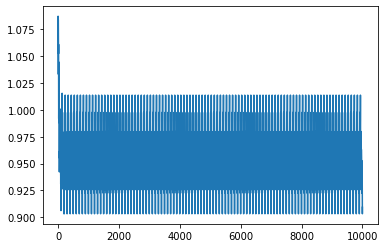

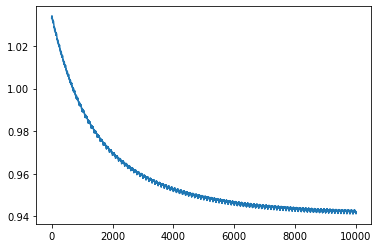

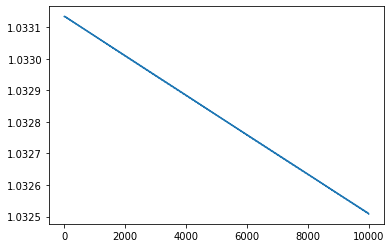

In [3]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n=100, d=10, d1=2, d2=2):
    X = np.random.rand(n, d)*2-1
    theta = np.random.rand(d, 1)
    noise = np.random.f(d1, d2, n).reshape((-1, 1))  # F-distribution
    noise = np.log(noise) / 2  # Fisher's Z-distribution
    return X, X @ theta + noise

def loss(X, y, theta):
    theta_temp = theta.reshape((-1,))
    first_term = np.log(8)
    second_term = 2 * (y - X @ theta_temp)
    third_term = 2 * np.log(2 * np.exp(y - X @ theta_temp) + 2)
    loss_value = first_term +  second_term - third_term 
    return -1 * np.average(loss_value)

def loss_grad_i(X, y, theta, i):
    ## ! -- code required
    theta_temp = theta.reshape((-1,))
    inner_value =  (1 - np.exp(2 * (y[i] - np.dot(X[i].T, theta_temp)))) / (np.exp(2 * (y[i] - np.dot(X[i].T, theta_temp))) + 1) 
    loss_grad = 2 * inner_value[0] * X[i]
    loss_grad = loss_grad.reshape((-1,1))
    return loss_grad

def sgd_plot(theta_init, X, y, n_steps=100):
    for learning_rate in [7e-2, 1e-3, 1e-6]:
        theta = theta_init.copy()
        losses = []
        for step_n in range(n_steps):
            for i in range(X.shape[0]):
                theta = theta - learning_rate * loss_grad_i(X, y, theta, i)
                loss_i = loss(X, y, theta) ## ! -- code required
                losses.append(loss_i)
        plt.plot(losses)
        plt.show()
    
def main(n=100, d=10, d1=2, d2=2):
    X, y = generate_data(n, d, d1, d2)
    theta_init = np.random.rand(d, 1)
    sgd_plot(theta_init, X, y)
    
main()

- For a very large learning rate (i.e. $7e^{-2}$), the loss decreases rapidly, but then overshoots the minima, and oscillates at a value higer than minima. 
- For a better and lower learning rate (i.e. $1e^{-3}$), the loss function decreases smoothly and ultimately reaches the minima. The shape of the loss function is also smooth, because the Gradient Descent behaves well in this range of learning rate for this loss function.
- For a much lower learning rate (i.e. $1e^{-6}$), the gradient descent takes smaller steps, hence it leads to a much slower update in the parameter $\theta$, and hence a much slower decrease in the loss function. Thus, over a large iterations also, the decrease is very less, and hence the loss function appears like a straight line.

### Problem 3: Logistic Regression

Assume that we observe data generated via the following model:

- $X \in \mathbf R^{n \times d}$ - constant data matrix
- $\theta_j \sim \mathcal N(0, \sigma_\theta)$; $\theta$ is $d$-dimensional random vector (`This is a prior information that` $\theta$ `follows normal distribution`)
- $\varepsilon_i \sim \text{Logistic}(0, \sigma_\epsilon)$; $\varepsilon$ is $n$-dimensional random noise vector distributed according to [Logistic](https://en.wikipedia.org/wiki/Logistic_distribution) distribution
- and we observe $\mathbf y = \mathbf 1[X \theta + \varepsilon \geq 0]$ - boolean random vector

or, in other words: there exists some data $X$, we sample weights vector $\theta$ of the corresponding shape from multivariate normal distribution, multiply features from $X$ by weights from $\theta$, add random logistically distributed noise to resulting numbers, and observe whether resulting (noisy) random variable exceeds zero. So we are given the data matrix X and y, we want to estimate the weight vector $\theta$ as accurately as possible. 

**`Show that given model definition above, the following holds:`**

**Q3.1**: $ P(y_i = 1 \ | \ \theta, \mathbf x_i) = \text{logistic}\Big(\frac{\theta^T \mathbf x_i}{\sigma_\epsilon}\Big)$

 where $ \text{logistic}(x) := \frac{1}{1+\exp(-x)}$ is a standard [logistic function](https://en.wikipedia.org/wiki/Logistic_function#Mathematical_properties), $\mathbf x_i$ denotes $i$-th data sample vector, $\mathbf 1[\dots]$ denotes indicator function. Do not get confused between standard [logistic function](https://en.wikipedia.org/wiki/Logistic_function#Mathematical_properties) and [Logistic](https://en.wikipedia.org/wiki/Logistic_distribution) distribution.
 
 **Hints:** 
 
 - for a random variable $\zeta \sim P$ what is $P(\zeta \leq a)$ ? (answer: $F_{\zeta}(a)$ - value of cumulative density function for the distribution of $\zeta$)

**Ans 3.1**

The value of $y_{i}$ can be $1$, only when $\theta^T \mathbf{x_{i}} + \varepsilon \geq 0 \implies \varepsilon \geq -\theta^T \mathbf{x_{i}}$.

Therefore,
$$P(y_i = 1 \ | \ \theta, \mathbf x_i) = P(\varepsilon \geq -\theta^T \mathbf{x_{i}}) = P(\varepsilon \leq \theta^T \mathbf{x_{i}})$$

Since, $\varepsilon$ follows a logistic distribution, 
$$F(x, \mu, \sigma_{\epsilon}) = \frac{1}{1 + e^\frac{-(x - \mu)}{\sigma_{\epsilon}}}$$

Here, $x = \theta^T \mathbf{x_{i}}, \sigma_{\epsilon} = \sigma_{\epsilon}$. Thus we get,
$$\implies P(y_i = 1 \ | \ \theta, \mathbf x_i) = \frac{1}{1 + e^\frac{-\theta^T \mathbf{x_{i}}}{\sigma_{\epsilon}}} = \text{logistic}\Big(\frac{\theta^T \mathbf x_i}{\sigma_\epsilon}\Big)$$

Let us consider $\sigma_{\epsilon} = 1$ everywhere further.

**Q3.2**: $ P(y_i \ | \ \theta, \mathbf x_i) = (\text{logistic}(\theta^T \mathbf x_i))^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)}$

**Ans 3.2**

From **Q 3.1** we have $P(y_i = 1 \ | \ \theta, \mathbf x_i) = \text{logistic}\Big(\frac{\theta^T \mathbf x_i}{\sigma_\epsilon}\Big)$

Similarly, $P(y_i = 0 \ | \ \theta, \mathbf x_i) = 1 - P(y_i = 1 \ | \ \theta, \mathbf x_i) = 1 - \text{logistic}\Big(\frac{\theta^T \mathbf x_i}{\sigma_\epsilon}\Big)$.

We have, $\sigma_\epsilon = 1$. And, $y_{i}$ is a Bernoulli random variable with two possible outcomes $0$ and $1$. From above two equations, we have the probability of each outcome.
Therefore, 

$$ P(y_i \ | \ \theta, \mathbf x_i) = (\text{logistic}(\theta^T \mathbf x_i))^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)}$$

**Q3.3**: $ \log P(y_i \ | \ \theta, \mathbf x_i) = y_i \theta^T \mathbf x_i - \log(1 + \exp(\theta^T \mathbf x_i))$



**Ans 3.3**
From **Q 3.2**, we have,
$ P(y_i \ | \ \theta, \mathbf x_i) = (\text{logistic}(\theta^T \mathbf x_i))^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)}$

$$\implies \log P(y_i \ | \ \theta, \mathbf x_i) = - y_i.\log ( 1 + e^{-\theta^T \mathbf{x_i}}) + (1 - y_i).\big [- \theta^T \mathbf{x_i} - \log(1 + e^{-\theta^T \mathbf{x_i}}) \big ]$$

$$\implies \log P(y_i \ | \ \theta, \mathbf x_i) = y_i \theta^T \mathbf{x_i} - \theta^T \mathbf{x_i} - \log(1 + e^{-\theta^T \mathbf{x_i}})$$

Now, $-\theta^T \mathbf{x_i} = \log e^{- \theta^T \mathbf{x_i}}$. This leads to further simplification:

$$\implies \log P(y_i \ | \ \theta, \mathbf x_i) = y_i \theta^T \mathbf{x_i}  + \log \Bigg ( \frac{e^{- \theta^T \mathbf{x_i}}}{1 + e^{-\theta^T \mathbf{x_i}}} \Bigg )$$

$$\implies \log P(y_i \ | \ \theta, \mathbf x_i) = y_i \theta^T \mathbf{x_i}  + \log \Bigg ( \frac{1}{1 + e^{\theta^T \mathbf{x_i}}} \Bigg )$$

$$\implies \log P(y_i \ | \ \theta, \mathbf x_i) = y_i \theta^T \mathbf{x_i}  - \log ( 1 + \exp(\theta^T \mathbf{x_i}))$$

The vector $\mathbf 1_{n \times 1}$ denotes column of ones.

**Q3.4**: $ \mathcal L_{MLE}(\theta) = \log P(\mathbf y \ | \ X, \theta) = y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta)) $

**Ans 3.4** From **Q3.3**, $ \log P(y_i \ | \ \theta, \mathbf x_i) = y_i \theta^T \mathbf x_i - \log(1 + \exp(\theta^T \mathbf x_i))$.

$\mathcal L_{MLE}(\theta) = \log P(\mathbf y \ | \ X, \theta) = $
$
\sum_{i=1}^{n} [ y_i \theta^T \mathbf x_i - \log(1 + \exp(\theta^T \mathbf x_i))]
= (y_1 \theta^T \mathbf x_1 + y_2 \theta^T \mathbf x_2 + \cdots + y_n \theta^T \mathbf x_n) - \begin{pmatrix}
  1 & 1 & \cdots & 1
\end{pmatrix}^T
\log \begin{pmatrix}
  1 + \exp(\theta^T \mathbf x_1)  \\
  1 + \exp(\theta^T \mathbf x_2) \\
  \vdots   \\
  1 + \exp(\theta^T \mathbf x_n)
\end{pmatrix}
$

We know, $\theta^T \mathbf x_i = \mathbf x_i ^ T \theta$.
Thus,
$$
\implies \mathcal L_{MLE}(\theta) = 
\begin{pmatrix}
  y_1 & y_2 & \cdots & y_n
\end{pmatrix}^T
\begin{pmatrix}
  - x_{1} -  \\
  - x_{2} - \\
  \vdots   \\
  - x_{n} -
\end{pmatrix}
\begin{pmatrix}
 \theta_{1}  \\
  \theta_{2} \\
  \vdots   \\
  \theta_{d}
\end{pmatrix} - 
\begin{pmatrix}
  1 & 1 & \cdots & 1
\end{pmatrix}^T
\log \Bigg[ \begin{pmatrix}
 1  \\
  1 \\
  \vdots   \\
  1
\end{pmatrix} +
\exp \Bigg ( \begin{pmatrix}
  - x_{1} -  \\
  - x_{2} - \\
  \vdots   \\
  - x_{n} -
\end{pmatrix}
\begin{pmatrix}
 \theta_{1}  \\
  \theta_{2} \\
  \vdots   \\
  \theta_{d}
\end{pmatrix}
\Bigg ) \Bigg ]
$$
$$ \implies \mathcal L_{MLE}(\theta) = y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta)) $$

**Q3.5**: $\frac{\partial \mathcal L_{MLE}(\theta)}{\partial \theta} = X^T(y - \text{logistic}(X\theta))) $

**Ans 3.5** From **Q 3.4**, we have, $ \mathcal L_{MLE}(\theta) = \log P(\mathbf y \ | \ X, \theta) = y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta)) $

Now, from $\frac{\partial b^T\theta}{\partial \theta} = b$, we have
 
$$\begin{equation}
\frac{\partial y^TX\theta}{\partial \theta} = X^Ty \tag{1}
\end{equation}$$

Also, 
$$\frac{\partial \ \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta))}{\partial \theta} = 
\begin{pmatrix}
\frac{\partial}{\partial \theta_{1}}\Big [ \sum_{i=1}^{n} \log (1 + \exp(\mathbf x_{i}^T\theta)) \Big ] \\
\vdots \\
\frac{\partial}{\partial \theta_{d}}\Big [ \sum_{i=1}^{n} \log (1 + \exp(\mathbf x_{i}^T\theta)) \Big ]
\end{pmatrix}
$$


= \begin{pmatrix}
\sum_{i=1}^{n} \frac{\exp(\mathbf x_{i}^T\theta)}{1 + \exp(\mathbf x_{i}^T\theta)}.x_{i1}\\
\vdots\\
\sum_{i=1}^{n} \frac{\exp(\mathbf x_{i}^T\theta)}{1 + \exp(\mathbf x_{i}^T\theta)}.x_{id}
\end{pmatrix}
=
\begin{pmatrix}
x_{11} & x_{21} & \cdots & x_{n1} \\
x_{12} & x_{22} & \cdots & x_{n2} \\
\vdots & \vdots & \ddots & \vdots \\
x_{1d} & x_{2d} & \cdots & x_{nd} 
\end{pmatrix} * \begin{pmatrix}
\frac{1}{1 + \exp(-x_1^T\theta)} \\
\frac{1}{1 + \exp(-x_2^T\theta)} \\
\vdots \\
\frac{1}{1 + \exp(-x_n^T\theta)}
\end{pmatrix}


$$
= \begin{pmatrix}
- x_1 - \\
- x_2 - \\
\vdots \\
- x_n -
\end{pmatrix}^T.\text{logistic}(X \theta)
= X^T.\text{logistic}(X \theta) \tag{2}
$$

From $(1)$ and $(2)$ - 
$$
\frac{\partial \mathcal L_{MLE}(\theta)}{\partial \theta} = X^T(y - \text{logistic}(X\theta))) 
$$

### Problem 4: Coding Logistic Regression


Here's the code that generates data according to model specification (**Problem 3**). You needn't change it.

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def generate_logistic_regression_data(n_samples=200, k_featues=2, sigma_eps=0.1, 
                                      sigma_theta=1, feature_correlation_rate=0, train_test_ratio=4):
    assert 0 <= feature_correlation_rate <= 1
    X_noncorr = np.random.rand(n_samples, k_featues)*2-1 # [0, 1] -> [-1, 1] center around zero
    mixture_matrix = np.eye(k_featues)*(1-feature_correlation_rate) + feature_correlation_rate/k_featues
    X = X_noncorr @ mixture_matrix
    theta_real = np.random.normal(scale=sigma_theta, size=k_featues)[:, np.newaxis] # column
    noise = np.random.logistic(scale=sigma_eps, size=n_samples)[:, np.newaxis]
    y = ((X @ theta_real + noise) > 0).astype(np.int16)
    split_idx = int(n_samples * train_test_ratio / (train_test_ratio + 1))
    return X[:split_idx, :], y[:split_idx], X[split_idx:, :], y[split_idx:], theta_real

**Q4.1**: Write (by filling in the missing code below) Gradient Descent and Stochastic Gradient Descent algorithm for the MLE loss and plot 

- MLE loss
- Decision Boundary (for 2D data)

Use results from **Q3.5**. Note that our loss is $loss(\theta) = -\mathcal L(\theta)$ and it is usually referred to as "the negative log-likelihood".

In [5]:
from numpy.linalg import norm
from scipy.spatial.distance import cosine
import matplotlib.cm as cm

def logistic_loss(X, y, theta_current, lambd):
    theta_current_temp = theta_current.reshape((-1,1))
    loss = np.dot(y.T, X@theta_current_temp) - np.sum(np.log(1 + np.exp(X @ theta_current)))
    return -1 * loss
    # return -1 * loss ## ! -- code required

def logistic_loss_gradient(X, y, theta_current, lambd):
    theta_current_temp = theta_current.reshape((-1,1))
    grad = X.T @ y - X.T @ (1/(1 + np.exp(-1 * (X @ theta_current_temp))))
    return -1 * grad ## ! -- code required

def logistic_loss_single_gradient(X, y, smaple_id, theta_current, lambd):
    x_i = X[smaple_id].reshape((1, -1))
    y_i = y[smaple_id].reshape((1, 1))
    return logistic_loss_gradient(x_i, y_i, theta_current, lambd)

def logistic_classification_accuracy(X, y, theta_current):
    pred = ( 1/(1 + np.exp(X @ theta))) >= 0.5
    count = 0
    for i in range(len(pred)):
        if pred[i] == y[i]:
            count += 1
    return count/len(y)

def run_MLE_gd(X, y, lambd, learning_rate = 0.01, max_epoch_n=200, init_theta=None):
    theta = init_theta if init_theta is not None else np.ones((X.shape[1], 1))*5
    steps = []
    for epoch_n in range(max_epoch_n):
        theta = theta - learning_rate * logistic_loss_gradient(X, y, theta, 1)
        steps.append(theta)
    return steps

def run_MLE_sgd(X, y, lambd, learning_rate = 0.01, max_epoch_n=200, init_theta=None):
    theta = init_theta if init_theta is not None else np.ones((X.shape[1], 1))*5
    steps = []
    for epoch_n in range(max_epoch_n):
        for smaple_id in range(X.shape[0]):
            theta = theta - learning_rate * logistic_loss_single_gradient(X, y, smaple_id, theta, 1)
            ## ! -- code required
        steps.append(theta)
    return steps

**Q4.1.1**: Plot (for 2D data) all the train and test set points and then plot the decision boundary on the same plot  by filling in the missing code below. Clearly indicate the train/test samples and positive/negative samples in the plot using different markers and colors.

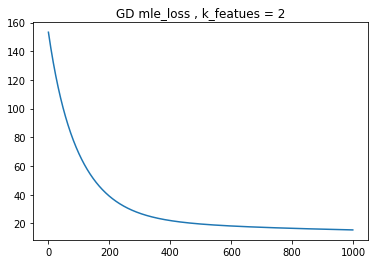

gd runtime: 0.2564562359999627


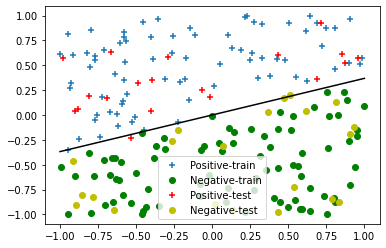

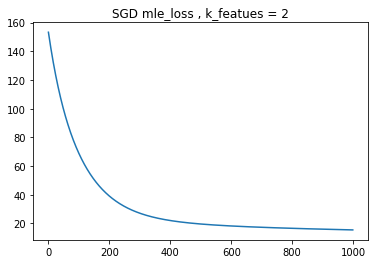

sgd runtime: 2.574610720999999


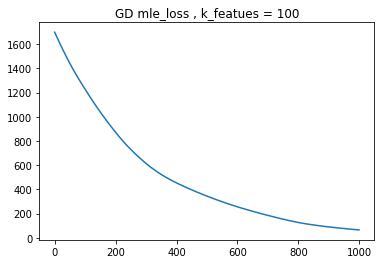

gd runtime: 0.30074631299999055


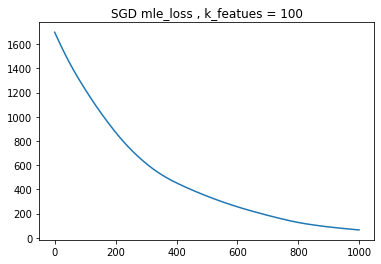

sgd runtime: 2.905760633


In [6]:
import time

def plot_decision_boundary(X_train, y_train, X_test, y_test, theta):
    ## ! -- code required
    blue, green = [], []
    blue_test, green_test = [], []
    for i in range(len(y_train)):
        if y_train[i] == 1:
            blue.append(X_train[i])
        else:
            green.append(X_train[i])

    for j in range(len(y_test)):
        if y_test[j] == 1:
            blue_test.append(X_test[j])
        else:
            green_test.append(X_test[j])
            
    plt.scatter([x[0] for x in blue], [x[1] for x in blue], marker='+', label='Positive-train')
    plt.scatter([x[0] for x in green], [x[1] for x in green], c = 'g', marker='o', label='Negative-train')
    plt.scatter([x[0] for x in blue_test], [x[1] for x in blue_test], c = 'r', marker='+', label='Positive-test')
    plt.scatter([x[0] for x in green_test], [x[1] for x in green_test], c = 'y', marker='o', label='Negative-test')
    xx = np.linspace(-1, 1)
    yy = - (xx * theta[0])/theta[1]
    plt.plot(xx, yy, 'k-')
    plt.legend(loc='best')
    plt.show()
    pass


def main():
    for k_features in [2, 100]:
        data_args = {'n_samples': 200, 'k_featues': k_features, 'sigma_eps': 0.3, 
                     'sigma_theta': 5, 'feature_correlation_rate': 0}
        data = generate_logistic_regression_data(**data_args)
        X_train, y_train, X_test, y_test, theta_real = data
        lambd = 0
        
        now = time.perf_counter()
        steps = run_MLE_gd(X_train, y_train, lambd, learning_rate=1e-3, max_epoch_n=1000)
        losses = [float(logistic_loss(X_train, y_train, thetaa, lambd)) for thetaa in steps]
        plt.plot(losses)
        plt.title('GD mle_loss , k_featues = %d' % k_features)
        plt.show()
        print('gd runtime:', time.perf_counter() - now)

        if k_features == 2:
            ## ! -- code required
            # call plot_decision_boundary() with appropriate arguments
            plot_decision_boundary(X_train, y_train, X_test, y_test, steps[-1])
            pass
        
        now = time.perf_counter()
        steps = run_MLE_sgd(X_train, y_train, lambd, learning_rate=1e-3, max_epoch_n=1000)
        losses = [float(logistic_loss(X_train, y_train, thetaa, lambd)) for thetaa in steps]
        plt.plot(losses)
        plt.title('SGD mle_loss , k_featues = %d' % k_features)
        plt.show()
        print('sgd runtime:', time.perf_counter() - now)
        
        plt.show()
    
main()

**Q4.1.2**: We expect loss to gradually decrease. Re-run code above several times (sgd might work differently). Why is SGD slower than GD?

**Ans 4.1.2**

- SGD involves a larger number of un-necessary computations compared to GD in the above implementation. The matrix multiplication is computation heavy in each iteration while for GD all is completed in a sinlge iteration.
- Further, added to the above fact is that, there are very less instances to classify. SGD might have been far better when the matrix multiplication in GD would have involved huge matrices. Since, this is not the case, SGD becomes slower compared to GD.

.

.

.

Wow, you made it this far. That is impressive. Congratulations!